In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data from Excel file
data = pd.read_excel('Wind_Energy_Rayalaseema.xlsx')
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Remove rows with missing values (if desired)
data = data.dropna()

# Check for and remove duplicates (if desired)
data = data.drop_duplicates()

# Outlier detection and handling (you can customize this)
from scipy import stats
z_scores = np.abs(stats.zscore(data[['soil_temp', 'temp', 'pressure', 'wind_speed']]))
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
data = data[~outliers]
# Split data into features (X) and target (y)
X = data[['soil_temp', 'temp', 'pressure', 'wind_speed']].values
y = data['Wind_Energy'].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')



Missing Values:
 date_hourly        0
hourly          95593
soil_temp1          1
temp1               0
solar_rd            0
u10                 0
v10              1105
soil_temp           1
temp                1
pressure         1105
wind_speed          0
Wind_Energy         0
dtype: int64
Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 693.7087 - mae: 20.8615 - val_loss: 467.6753 - val_mae: 16.6849
Epoch 2/150
1/1 [==============================] - 0s 38ms/step - loss: 691.3979 - mae: 20.8092 - val_loss: 466.1032 - val_mae: 16.6339
Epoch 3/150
1/1 [==============================] - 0s 38ms/step - loss: 689.0762 - mae: 20.7578 - val_loss: 464.5394 - val_mae: 16.5798
Epoch 4/150
1/1 [==============================] - 0s 34ms/step - loss: 686.7577 - mae: 20.7057 - val_loss: 462.8332 - val_mae: 16.5205
Epoch 5/150
1/1 [==============================] - 0s 37ms/step - loss: 684.3834 - mae: 20.6518 - val_loss: 461.0733 - val_mae: 16.4601
Epoch 6/150
1/1 [============

In [3]:
# Make predictions for new input data
new_soil_temp_value = 22.0
new_temp_value = 25.0  
new_pressure_value = 96156
new_wind_speed_value = 2

# Create an array with the new input data
new_data = np.array([[new_soil_temp_value,new_temp_value, new_pressure_value, new_wind_speed_value]])

# Standardize the new input data using the same scaler used during training
new_data = scaler.transform(new_data)  # Standardize the new input data

# Make predictions for the new input data
predicted_wind_energy = model.predict(new_data)

print(f'Predicted Wind Energy: {predicted_wind_energy[0][0]}')
model.save('wind_energy_model.h5')



1/1 [==============================] - 0s 497ms/step
Predicted Wind Energy: 2.3033645153045654


c:\Users\Subhang Mokkarala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 39ms/step


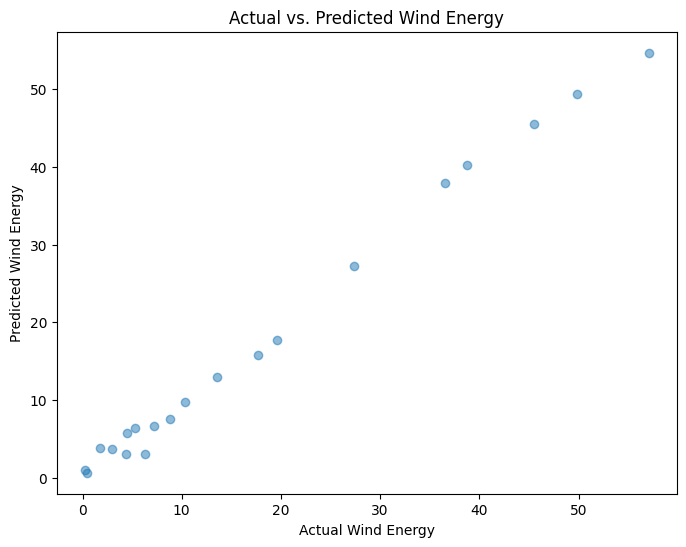

In [8]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Wind Energy")
plt.ylabel("Predicted Wind Energy")
plt.title("Actual vs. Predicted Wind Energy")
plt.show()

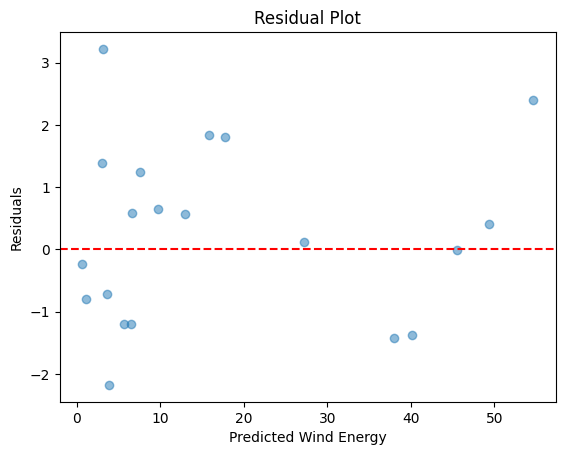

In [6]:
#This plot can help you check for patterns or non-linearity in your model's errors.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Wind Energy")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


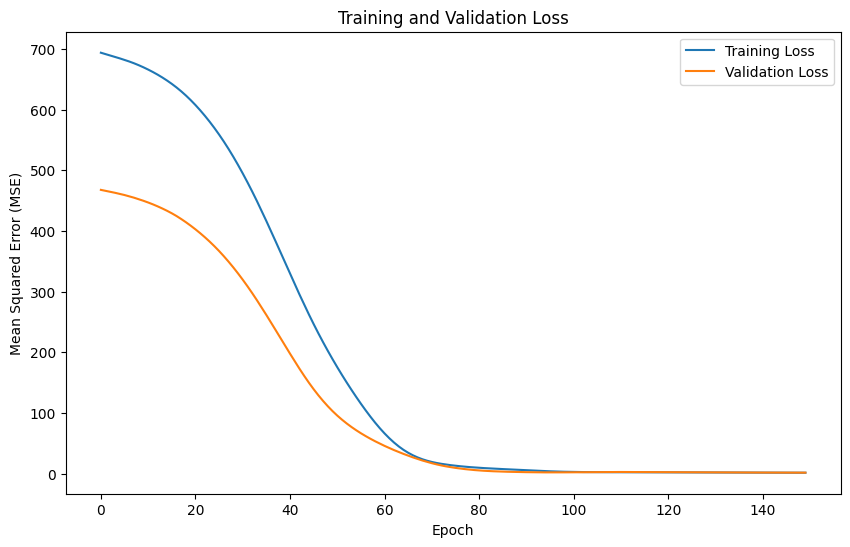

In [9]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
